# Lesson 6 Assignment - Video Store Data Analysis

## Author - Kenji Oman

### Background
Consider the data collected by a hypothetical video store for 50 regular customers.

This data consists of a table which, for each customer, records the following attributes:
* Gender
* Income
* Age
* Rentals - Total number of video rentals in the past year
* Avg. per visit - Average number of video rentals per visit during the past year
* Incidentals - Whether the customer tends to buy incidental items such as refreshments when renting a video
* Genre - The customer's preferred movie genre

## Tasks
Use the provided Video_Store.csv file, perform each of the following data preparation tasks and answer the related questions:

a) Split the age attribute into bins, using a bin depth of 4.

b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again. 

c) Use z-score normalization to standardize the values of the Rentals attribute.

d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results. 

e) Create a list of your categorical values so that you can encode them. 

f) On your categorical values, encode them and then perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You will need to construct a complete Correlation Matrix (Please read the brief document <a href="https://library.startlearninglabs.uw.edu/DATASCI420/PDF/DATASCI%20420%20Basic%20Correlation%20Analysis.pdf">Basic Correlation Analysis</a> for more detail). *Can you observe any "significant" patterns among groups of two or more variables? Explain.*

g) Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). *What patterns do you see? Explain.*

**Note:** To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.

h) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.


**Hints:**

- Review basic statistics for different attributes by using the pandas functions you learned about

- Consider discretizing the Age attribute.

- Make sure numerical variables are on the same scale

# Module/ Data Loading

In [1]:
# Data set contains 600 rows and 11 columns.
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Video_Store.csv"

In [2]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from IPython.display import display, Markdown

In [3]:
# Load the data
df = pd.read_csv(URL)
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,25,27,2.5,Yes,Action
1,2,F,54000,33,12,3.4,No,Drama
2,3,F,32000,20,42,1.6,No,Comedy
3,4,F,59000,70,16,4.2,Yes,Drama
4,5,M,37000,35,25,3.2,Yes,Action


# Tasks
## a) Split the age attribute into bins, using a bin depth of 4.

In [4]:
# We want to split the age attribute into bins of 4
df.Age = pd.qcut(df.Age, 4)
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,"(22.0, 30.0]",27,2.5,Yes,Action
1,2,F,54000,"(30.0, 37.5]",12,3.4,No,Drama
2,3,F,32000,"(14.999, 22.0]",42,1.6,No,Comedy
3,4,F,59000,"(37.5, 70.0]",16,4.2,Yes,Drama
4,5,M,37000,"(30.0, 37.5]",25,3.2,Yes,Action


## b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again.

In [5]:
# Min-max scaling on income
minmax = MinMaxScaler()
df['minmaxIncome'] = minmax.fit_transform(df.Income.values.reshape(-1,1))
df.head()

/home/koman/miniconda3/envs/dsc/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,minmaxIncome
0,1,M,45000,"(22.0, 30.0]",27,2.5,Yes,Action,0.500000
1,2,F,54000,"(30.0, 37.5]",12,3.4,No,Drama,0.602273
2,3,F,32000,"(14.999, 22.0]",42,1.6,No,Comedy,0.352273
3,4,F,59000,"(37.5, 70.0]",16,4.2,Yes,Drama,0.659091
4,5,M,37000,"(30.0, 37.5]",25,3.2,Yes,Action,0.409091


## c) Use z-score normalization to standardize the values of the Rentals attribute.

In [6]:
# Want to do standard scaling on Rentals
stdscale = StandardScaler()
df['stdscaleRentals'] = stdscale.fit_transform(df.Rentals.values.reshape(-1,1))
df.head()

/home/koman/miniconda3/envs/dsc/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/koman/miniconda3/envs/dsc/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,minmaxIncome,stdscaleRentals
0,1,M,45000,"(22.0, 30.0]",27,2.5,Yes,Action,0.500000,0.076560
1,2,F,54000,"(30.0, 37.5]",12,3.4,No,Drama,0.602273,-1.434493
2,3,F,32000,"(14.999, 22.0]",42,1.6,No,Comedy,0.352273,1.587613
3,4,F,59000,"(37.5, 70.0]",16,4.2,Yes,Drama,0.659091,-1.031546
4,5,M,37000,"(30.0, 37.5]",25,3.2,Yes,Action,0.409091,-0.124914


## d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than \$25K and keep in a separate column. Later you will compare which method has better results.

In [7]:
# Bin the Income column to our categories.
df.loc[df.Income < 25_000, 'binIncome'] = 'Low'
df.loc[df.Income >= 60_000, 'binIncome'] = 'High'
df.binIncome.fillna('Mid', inplace=True)
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,minmaxIncome,stdscaleRentals,binIncome
0,1,M,45000,"(22.0, 30.0]",27,2.5,Yes,Action,0.500000,0.076560,Mid
1,2,F,54000,"(30.0, 37.5]",12,3.4,No,Drama,0.602273,-1.434493,Mid
2,3,F,32000,"(14.999, 22.0]",42,1.6,No,Comedy,0.352273,1.587613,Mid
3,4,F,59000,"(37.5, 70.0]",16,4.2,Yes,Drama,0.659091,-1.031546,Mid
4,5,M,37000,"(30.0, 37.5]",25,3.2,Yes,Action,0.409091,-0.124914,Mid


## e) Create a list of your categorical values so that you can encode them.

In [8]:
# Categorical variables are:
catcols = ['Gender', 'Age', 'Incidentals', 'Genre', 'binIncome']

## f) On your categorical values, encode them and then perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You will need to construct a complete Correlation Matrix (Please read the brief document <a href="https://library.startlearninglabs.uw.edu/DATASCI420/PDF/DATASCI%20420%20Basic%20Correlation%20Analysis.pdf">Basic Correlation Analysis</a> for more detail). *Can you observe any "significant" patterns among groups of two or more variables? Explain.*

In [9]:
# encode the categorical attributes
cat_onehot = pd.get_dummies(df[catcols])#, drop_first=True) Won't drop, since we want to look at correlations
with pd.option_context('max_columns', 10000):
    display(cat_onehot.head())

,Gender_F,Gender_M,"Age_(14.999, 22.0]","Age_(22.0, 30.0]","Age_(30.0, 37.5]","Age_(37.5, 70.0]",Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama,binIncome_High,binIncome_Low,binIncome_Mid
0,0,1,0,1,0,0,0,1,1,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0,1,0,0,1
2,1,0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,1,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,1,1,0,0,0,0,1


### Categorical Correlation Matrix, direction matters

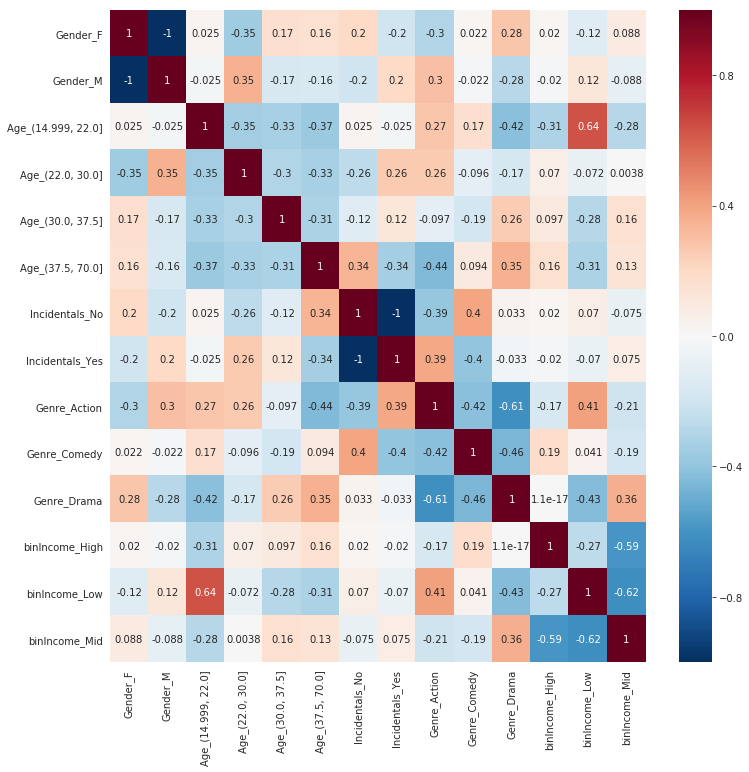

### Categorical Correlation Clustered, direction matters

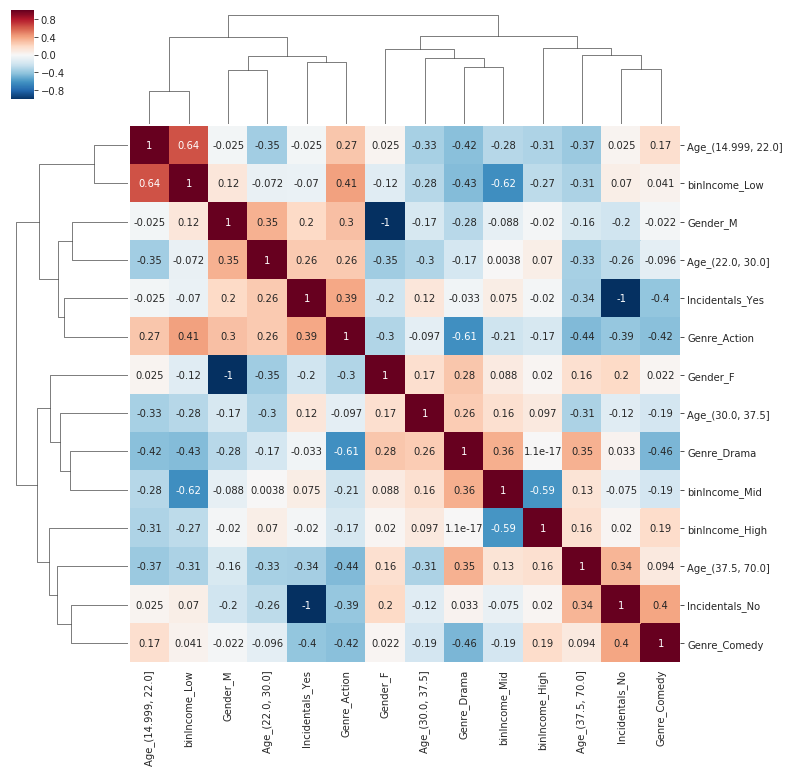

In [10]:
# Make/ display a correlation matrix, (where direction of relationship matters)
display(Markdown('### Categorical Correlation Matrix, direction matters'))
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(111)
sns.heatmap(cat_onehot.corr(), annot=True, cmap='RdBu_r', ax = ax)
plt.show()

# Also, clustered by correlations
display(Markdown('### Categorical Correlation Clustered, direction matters'))
sns.clustermap(cat_onehot.corr(), annot=True, cmap='RdBu_r', figsize=(12,12))
plt.show()

### Categorical Correlation Clustering, magnitude only

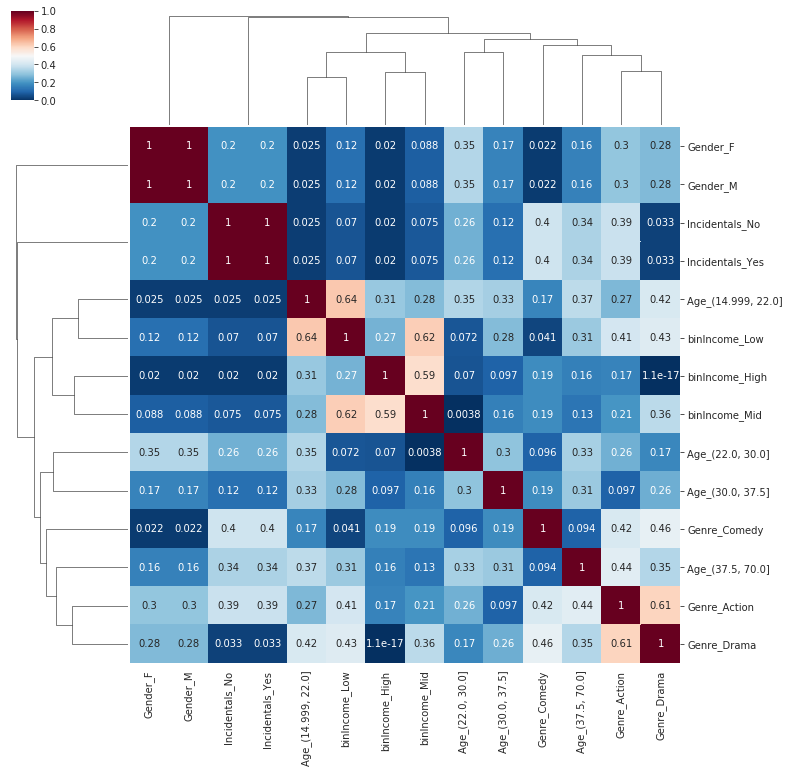

In [11]:
# And, do the same, but where we only look at the strength
# of these relationships, and only need the clustered version
display(Markdown('### Categorical Correlation Clustering, magnitude only'))
sns.clustermap(cat_onehot.corr().abs(), annot=True, cmap='RdBu_r', figsize=(12,12))
plt.show()

### Summary
Above, we have 3 types of plots for correlation:
1. [A Correlation Matrix](#Categorical-Correlation-Matrix%2C-direction-matters)
2. [A Clustered Correlation Matrix](#Categorical-Correlation-Clustered%2C-direction-matters)
3. [A Clustered Correlation Matrix, dropping direction](#Categorical-Correlation-Clustering%2C-magnitude-only)

Based on 1 and 3, we see that for our binary columns, they are perfectly opposite in direction of correlation with the other features, but with the same exact magnitude (as we'd expect).  Looking at these in a little more detail,

**For Gender**:
* Video store customers in their 20's (22, 30] tend to loosly more likely be men (correlation of 0.35), while all other age groups weakly (correlation of ~0 - 0.16) tend to more likely be women.
* Men are more likely to buy incidentals (correlation of 0.2)
* Interestingly, for this sample of video store customers, the trend is pretty weak (-0.12, 0.088, 0.02 for correlation of women with low to high income), but **women tend to make more than men**.  Perhpas women don't try to escape reality via video watching (for low income women) as much as men do :-P
* Men are definitely more interested in action movies (0.3) vs women, who prefer drama (0.28).  Gender doesn't really have any effect on if someone wants to watch a comedy movie.

**For Incidentals**:
* As noted above, men are more likely to purchase incidentals.
* People in their 20's and 30's (22, 30], (30, 37.5] are more likely to purchase incidentals (.26 and .12 for the respective age groups), with other groups not as likely to purchase them.  The younger groups probably don't have the money (have to rely on a parent), and the older groups likely already have whatever snacks they need at home with their family). Of note, the oldest group (37.5, 70] have the strongest correlation magnitude (0.34) _against_ purchasing incidentals, with the youngest adult group (22, 30] having the strongest correlation _for_ purchasing incidentals.
* Interestingly, we find that action movie watchers are much more likely to purchase incidentals, while comedy watchers are not (0.39 vs -0.4).  Not entirely sure what to make of that ...  Drama watchers, however, are fairly abivalent towards if they will purchase incidentals or not (0.033)
* In terms of income, there isn't much of a correlation with the likelihood to purchase incidentals (~ -0.07 - 0.075).  This would imply that income is not a good predictor of incidentals, and other demographics/ features do a better job at this.

Looking at the clustered version of the correlation matrix (#2), we see more or less what we observed above:

* Men/boys that have gone to this video store over the past year are more likely to be in their 20's (22-30), buy incidentals, like action movies, and have lower income
* Women/girls, on the other hand, tend to be older, make more money, prefer dramas, and don't buy incidentals.
* The people who purchase incidentals are the most likely to also be renting comedies.

Finally, for the bottom plot (#3), which drops the direction of the correlation and only at the strength, we see which features share similar magnitudes of effects with which other features.  From that, even though we observed that action movie and drama movie watchers tend to have opposite effects with other features, we find that the level of impact they have/ how strongly correlated with other features is fairly similar.  Other groupings that also seem to react in similar ways (ignoring direction) are:

* Low income and young people
* Middle and High income people in their 20's and 30's
* Loosly speaking, the oldest individuals, with those who watch comedy, action and drama
 - From this, looking back at the earlier plots, we see that older people dislike action movies just about as much as they prefer dramas.

## g) Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). *What patterns do you see? Explain.*

In [12]:
# Let's include all the columns to look at their summary statistics
df[df.Rentals >= 30].describe(include='all')

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,minmaxIncome,stdscaleRentals,binIncome
count,18.000000,18,18.000000,18,18.000000,18.000000,18,18,18.000000,18.000000,18
unique,NaN,2,NaN,4,NaN,NaN,2,3,NaN,NaN,3
top,NaN,F,NaN,"(14.999, 22.0]",NaN,NaN,Yes,Action,NaN,NaN,Low
freq,NaN,10,NaN,9,NaN,NaN,10,9,NaN,NaN,7
mean,26.833333,NaN,37666.666667,NaN,37.277778,2.777778,NaN,NaN,0.416667,1.111911,NaN
std,15.049917,NaN,23126.251953,NaN,5.849138,0.927080,NaN,NaN,0.262798,0.589224,NaN
min,3.000000,NaN,2000.000000,NaN,30.000000,1.600000,NaN,NaN,0.011364,0.378771,NaN
25%,15.750000,NaN,19500.000000,NaN,32.250000,2.150000,NaN,NaN,0.210227,0.605429,NaN
50%,26.500000,NaN,31500.000000,NaN,36.500000,2.550000,NaN,NaN,0.346591,1.033560,NaN
75%,39.000000,NaN,56000.000000,NaN,41.750000,3.375000,NaN,NaN,0.625000,1.562429,NaN


In [13]:
# Since we see only 18 customers, let's also do value counts on these categories
attributes = []
for col in df.columns:
    temp = df.loc[df.Rentals >=30, col].value_counts(dropna=False).reset_index()
    temp.rename(columns={col: 'values', 'index': col}, inplace=True)
    attributes.append(temp.head(10))
        
with pd.option_context('max_columns', 1000):
    display(pd.concat(attributes, axis=1))

,Cust ID,values,Gender,values,Income,values,Age,values,Rentals,values,Avg Per Visit,values,Incidentals,values,Genre,values,minmaxIncome,values,stdscaleRentals,values,binIncome,values
0,29,1,F,10.0,24000,2,"(14.999, 22.0]",9.0,30,2,2.3,2,Yes,10.0,Action,9.0,0.829545,2,1.587613,2,Low,7.0
1,27,1,M,8.0,74000,2,"(22.0, 30.0]",6.0,48,2,1.8,2,No,8.0,Comedy,5.0,0.261364,2,0.680981,2,Mid,7.0
2,3,1,NaN,NaN,56000,2,"(37.5, 70.0]",2.0,42,2,2.1,1,NaN,NaN,Drama,4.0,0.625000,2,2.192034,2,High,4.0
3,36,1,NaN,NaN,6000,1,"(30.0, 37.5]",1.0,33,2,3.3,1,NaN,NaN,NaN,NaN,0.340909,1,0.580244,2,NaN,NaN
4,43,1,NaN,NaN,31000,1,NaN,NaN,32,2,4.6,1,NaN,NaN,NaN,NaN,0.352273,1,0.378771,2,NaN,NaN
5,6,1,NaN,NaN,15000,1,NaN,NaN,31,1,3.1,1,NaN,NaN,NaN,NaN,0.761364,1,1.688350,1,NaN,NaN
6,45,1,NaN,NaN,62000,1,NaN,NaN,43,1,1.6,1,NaN,NaN,NaN,NaN,0.454545,1,1.083929,1,NaN,NaN
7,8,1,NaN,NaN,68000,1,NaN,NaN,41,1,3.4,1,NaN,NaN,NaN,NaN,0.056818,1,1.486876,1,NaN,NaN
8,50,1,NaN,NaN,29000,1,NaN,NaN,40,1,3.6,1,NaN,NaN,NaN,NaN,0.545455,1,0.983192,1,NaN,NaN
9,11,1,NaN,NaN,18000,1,NaN,NaN,39,1,2.7,1,NaN,NaN,NaN,NaN,0.181818,1,0.479507,1,NaN,NaN


From the above, we see that we only have 18/50 = 36% of our customers who we consider to be "good", and the majority of them are females (10/18 = 55.6%).  We also notice:

* Income: over 1/4 of good customers are low income (cutoff was < 25k), with < 1/4 being from the high income bracket (cutoff was >= 60k).  So, it looks like our target should be low and middle income individuals (looking at the value counts, we actually see these two brakcets make up 14/18 = 77.8% of our good customers).
* Age: Interestingly, half our our good customers are from the lowest age bracket!  The next highest age bracket is also the next most frequent in our good customers.
* Rentals: Our best customers rent anywhere from 30-48 movies.  This is equates to 2.5 to 4 movies a month (upperbound of about one movie a week!).
* Average Per Visit: This is all over the place, so different people have different ways of bunching up their borrowing (likely, some people like to come almost every week or so, while others like to rent a bunch at once, and return to re-stock less frequently).
* Incidentals: Over half of our best customers also purchase incidentals (perhaps, by how frequently we see these customers, they become more familiar/ comfortable with the store, and thus are more likely to give in and make additional purchases).  This is a little hard to interpret, though, since it is a binary column -- **we don't know what threshold was used to call someone as being a purchaser of incidentals**.  If they only purchase once, are they considered yes in the incidental column, or must they have purchased every time?  This is a bit hard to interpret without knowing this.  Likely, from what information we are given, if a customer purchases incidentals over half the time, they are considered a "yes" for this column, but someone who comes to the store very freqently may only purchase 1/3 of the time, but still be purchasing more than someone who comes less frequently, for example.  Better data for this column would be the number of visits they purchased incidentals, along with the number of times they visited, and the average value of items they bought.
* Genre: Half of our best customers prefer Action movies, with, interestingly, the next highest category being comedy (although, our numbers are small, so all we can say is comdedy and drama are similar in number, but less than action)

Now, let's see how these values compare to our "less good" customers -- those who rent less than 30 movies a year)

In [14]:
# Let's do this graphically. First, let's add a column for good customers
df.loc[df.Rentals >= 30, 'goodCust'] = 'Yes'
df.loc[df.Rentals < 30, 'goodCust'] = 'No'

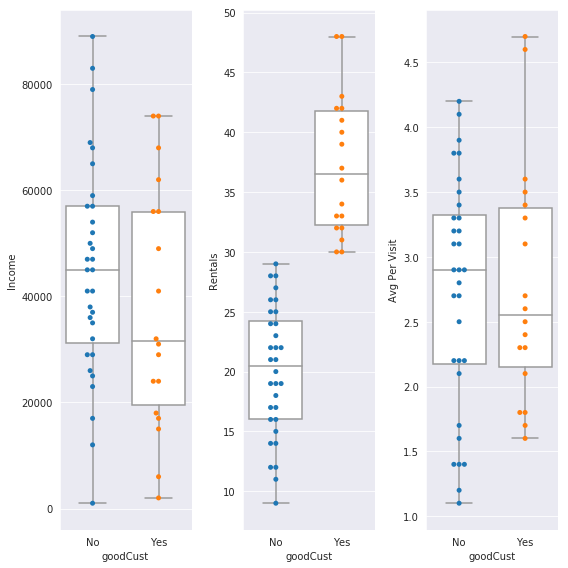

In [15]:
# Now, boxplots of the numerical variables
f = plt.figure(figsize=(8, 8))
i = 0
for col in ['Income', 'Rentals', 'Avg Per Visit']:
    i += 1
    ax = f.add_subplot(1, 3, i)
    sns.boxplot(x='goodCust', y=col, data=df, ax=ax, color='white')
    sns.swarmplot(x='goodCust', y=col, data=df, ax=ax, dodge=True)
plt.tight_layout()
plt.show()

### Continuous vs Categorical vs Good Customer

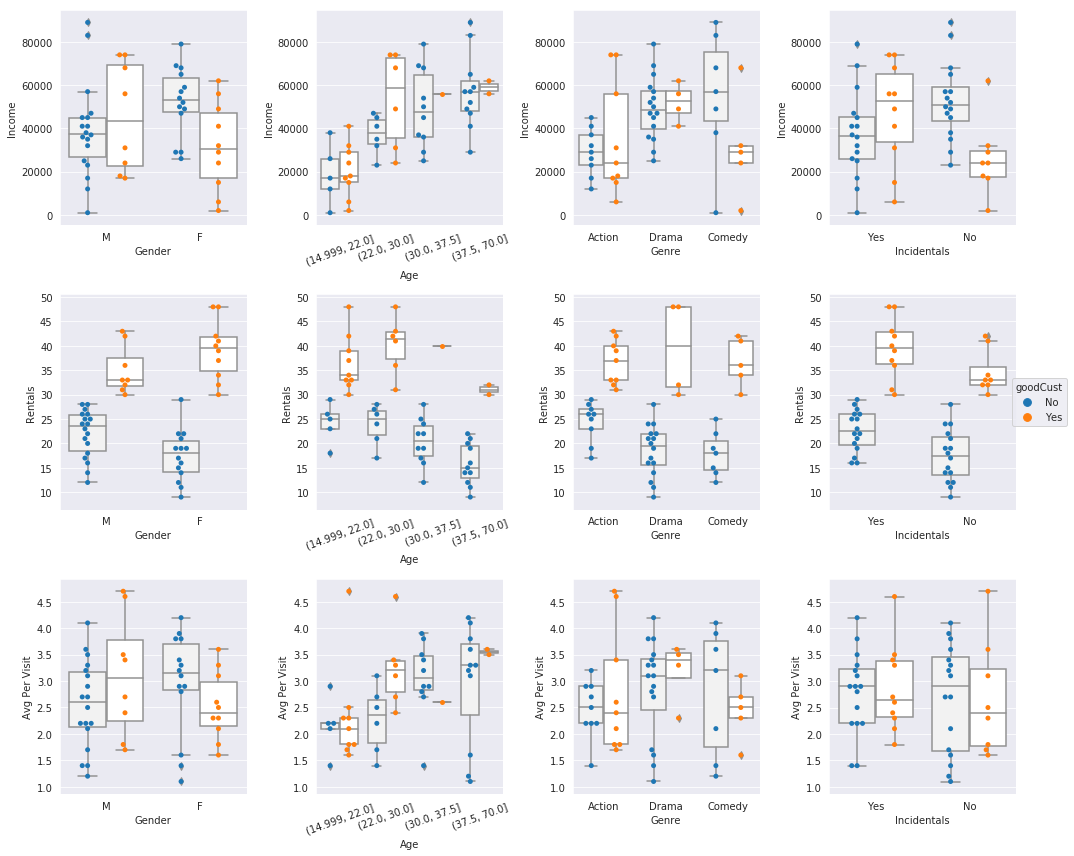

In [16]:
# And now, split by categorical variables too
display(Markdown('### Continuous vs Categorical vs Good Customer'))
f = plt.figure(figsize=(15,12))
i = 0
ax = []
for col in ['Income', 'Rentals', 'Avg Per Visit']:
    for cat in ['Gender', 'Age', 'Genre', 'Incidentals']:
        i += 1
        ax.append(f.add_subplot(3, 4, i))
        sns.boxplot(x=cat, y=col, data=df, hue='goodCust', dodge=True, ax=ax[i-1], color='white')
        sns.swarmplot(x=cat, y=col, data=df, hue='goodCust', dodge=True, ax=ax[i-1])
        ax[i-1].legend().set_visible(False)
        
        # If in the Age column
        if cat == 'Age':
            # These x-tics can be hard to see, so rotate
            plt.xticks(rotation=20)
        
# Re-add the legend for the middle left plot
# First, get the items we want in our legend
handles, labels = ax[7].get_legend_handles_labels()
# Now, set visible, and place it with title
ax[7].legend().set_visible(True)
ax[7].legend(handles[-2:], labels[-2:], loc='center right', bbox_to_anchor=(1.3, 0.5), title='goodCust')
plt.tight_layout()
plt.show()

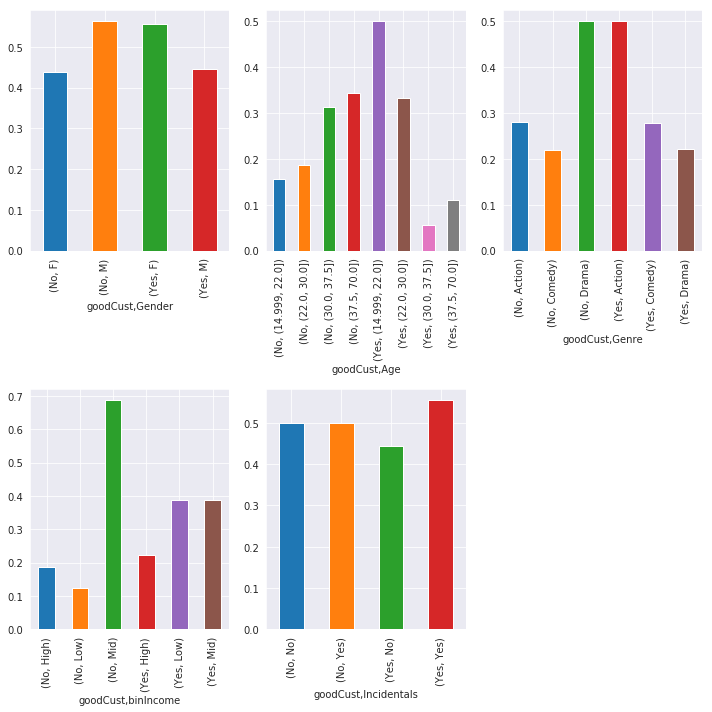

In [17]:
# And, generate normalized bar-charts for the categorical variables too
f = plt.figure(figsize=(10,10))
i = 0
for cat in ['Gender', 'Age', 'Genre', 'binIncome', 'Incidentals']:
    i += 1
    ax = f.add_subplot(2,3,i)
    df.groupby('goodCust')[cat].value_counts(normalize=True).sort_index().plot(kind='bar', ax=ax)
plt.tight_layout()
plt.show()

To simplify things, let's just use the normalized bar-charts to talk about categorical variables, and the boxplots for the continuous variables. Things we notice:

* Compared to the rest of the customers, good customers are:
 - more likely to be female
 - skewed heavily towards being younger
 - much more likely to watch action movies, and to some extent, comedies, and are much less likely to watch dramas
 - interesting to note, more likely to be from the low income group, yes, but **actually less likely to be from the middle income group (contrary to what we suggested earlier). Also, they have a bit higher representation in the high income group compared to other customers**. This is a bit hard to see in the boxplots of the raw income values, as the boxplots are drawn with all the datapoints for the category, so the 25th and 75 percentiles don't seem to shift as much (the 25 percentile does go down a bit), but in reality, the values went more to their exreme ends (made obvious in the barcharts)
 - more likely to purchase incidentals
 - In the boxplot for the average number of movies a customer rents per visit, we see good customers tend to rent _less_ movies, actually, although they have a skew to the right, while other customers have a slight skew to the left.  Also, good customers do have those customers with the highest average number of movie rentals per visit.

## h) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.

In [18]:
# Find the number of times a customer visited the store over the past year
df['num_of_visits'] = (df.Rentals / df['Avg Per Visit']).round(0).astype(int)
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,minmaxIncome,stdscaleRentals,binIncome,goodCust,num_of_visits
0,1,M,45000,"(22.0, 30.0]",27,2.5,Yes,Action,0.500000,0.076560,Mid,No,11
1,2,F,54000,"(30.0, 37.5]",12,3.4,No,Drama,0.602273,-1.434493,Mid,No,4
2,3,F,32000,"(14.999, 22.0]",42,1.6,No,Comedy,0.352273,1.587613,Mid,Yes,26
3,4,F,59000,"(37.5, 70.0]",16,4.2,Yes,Drama,0.659091,-1.031546,Mid,No,4
4,5,M,37000,"(30.0, 37.5]",25,3.2,Yes,Action,0.409091,-0.124914,Mid,No,8


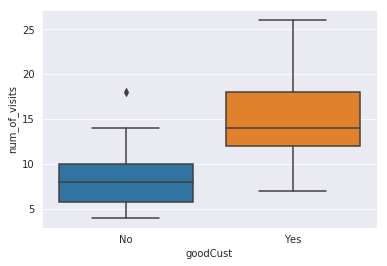

In [19]:
# Check how the number of visits varies between good and other customers
sns.boxplot(x='goodCust', y='num_of_visits', data=df)
plt.show()

In [20]:
# Let's say good customers purchase incidentals for half
# of their visits to the store, while other customers only do
# so 1/4 of the time (since we don't actually know what the cutoff
# for incidentals = "yes" is).  Also, let's say that, if someone
# purchases anything, they purchase the same amount of incidentals on average.
# Thus, we have:
print('Total # of incidental purchases from good customers:',
      (df[df.goodCust == 'Yes'].num_of_visits * 0.5).sum())
print('Total # of incidental purchases from normal customers:',
      (df[df.goodCust == 'No'].num_of_visits * 0.25).sum())

Total # of incidental purchases from good customers: 133.0
Total # of incidental purchases from normal customers: 66.0


### Observations
From the above, we see that a lot more of the incidental purchases are indeed made by our "good customers" (granted, there are some assumptions that, if we could talk to the data generators, we could fill in some of the blanks).  Thus, the company should:

* focus on keeping its good customers
* try to convert more of the normal customers into good customers, or at least into those who purchase incidentals

Why are people good customers? There are some demographic considerations that can't be changed (good customers are somewhat more likely to be female, and are younger -- as people age, they probably have less time to spend watching movies).  However, we also noticed that good customers are enriched for high earners.

If we take a look at the [income vs incidental vs good customer boxplots](#Continuous-vs-Categorical-vs-Good-Customer), we see first that a large number of normal customers purchase incidentals too (but as we saw above, good customers come to the store much more frequently, so they dominate the incidental sales).  If we look at just those who are good customers, we see that those who purchase incidentals are on the wealthier side of our good customers' income levels.  Thus, **one option is to try to convert our good customers who don't purchase incidentals into those who do.  This is most likely to be achieved by catering to incidental items that would be more to their interests** (perhaps provide cheaper incidentals, packaged in smaller quantities), as these individuals are already coming to the store regularly.

If we want to convert other non-good customers into good customers (probably the 2nd best thing to impact incidental sales as I would hypothesize that incidental sales are largely driven by habituation with the environment), one approach would be to try to cater to their interests (**provide more dramas**), but if all we want is to drive sales of incidentals in these individuals, we need to take a look at how our incidental sales correlate with the other variables ([such as we did earlier](#Categorical-Correlation-Matrix%2C-direction-matters)).  From that, we see that we need to **cater to lovers of action movies, and definitely *not* comedies** -- why do people renting comedies not purchase incidentals??

### Summary
Steps to increase incidental sales:
* First, focus on keeping good customers
* Convert good customers who don't frequently purchase incidentals (they tend to be in the lower income brackets), so change the portion size/ price of incidentals to enter their price point
* Convert people into good customers by catering to their interests (dramas) -- this will also likely drive up their incidental sales, as I hypothesize incidental sales are largely driven by if people are habituated to seeing them for sale/ being enticed by the items.
* Cater to the kind of movie that most drives incidental sales (action), and definitely not comedies (perhaps, even place action movies closer to where the incidentals are sold, to further enhance these sales -- although, maybe this is already the case, with comedies the furthest away :P).